<center> <img src="https://miro.medium.com/v2/resize:fit:1200/1*lbDXL0IuitCRz4mpZ7MmfQ.png" width=55% > </center>

<br><br>

<center> 
    <font size="6">Final Lab (Part 2): Image Classification using Convolutional Neural Networks </font>
</center>
<center> 
    <font size="4">Computer Vision 1 University of Amsterdam</font> 
</center>
<center> 
    <font size="4">Due 23:59PM, October 18, 2024 (Amsterdam time)</font> 
</center>
<center> 
    <font size="4"><b>TA's:  Yue, Konrad & Thies</b></font>
</center>

<br><br>

***

<br><br>

<center>

Student1 ID:  15388867\
Student1 Name: Jose Garcia

Student2 ID: 15735664\
Student2 Name: Lisanne Wallaard

Student3 ID: 11307943\
Student3 Name: Julio Smidi

</center>

### **Coding Guidelines**

Your code must be handed in this Jupyter notebook, renamed to **StudentID1_StudentID2_StudentID3.ipynb** before the deadline by submitting it to the Canvas Final Lab: Image Classification Assignment. Please also fill out your names and IDs above.

For full credit, make sure your notebook follows these guidelines:

- Please express your thoughts **concisely**. The number of words does not necessarily correlate with how well you understand the concepts.
- Understand the problem as much as you can. When answering a question, provide evidence (qualitative and/or quantitative results, references to papers, figures, etc.) to support your arguments. Not everything might be explicitly asked for, so think about what might strengthen your arguments to make the notebook self-contained and complete.
- Tables and figures must be accompanied by a **brief** description. Add a number, a title, and, if applicable, the name and unit of variables in a table, and name and unit of axes and legends in a figure.

**Late submissions are not allowed.** Assignments submitted after the strict deadline will not be graded. In case of submission conflicts, TAs’ system clock is taken as reference. We strongly recommend submitting well in advance to avoid last-minute system failure issues.

**Environment:** Since this is a project-based assignment, you are free to use any feature descriptor and machine learning tools (e.g., K-means, SVM). You should use Python for your implementation. You are free to use any Python library for this assignment, but make sure to provide a conda environment file!

**Plagiarism Note:** Keep in mind that plagiarism (submitted materials which are not your work) is a serious offense and any misconduct will be addressed according to university regulations. This includes using generative tools such as ChatGPT.

**Ensure that you save all results/answers to the questions (even if you reuse some code).**

### **Report Preparation**

Your tasks include the following:

1. **Report Preparation:** For both parts of the final project, students are expected to prepare a report. The report should include all details on implementation approaches, analysis of results for different settings, and visualizations illustrating experiments and performance of your implementation. Grading will be based on the report, so it should be as self-contained as possible. If the report contains faulty results or ambiguities, TAs can refer to your code for clarification. 

2. **Explanation of Results:** Do not just provide numbers without explanation. Discuss different settings to show your understanding of the material and processes involved.

3. **Quantitative Evaluation:** For quantitative evaluation, you are expected to provide the results based on performance (accuracy, learning loss and learning curves). 

4. **Aim:** Understand the basic Image Classification pipeline using Convolutional Neural Nets (CNN's).

5. **Working on Assignments:** Students should work in assigned groups for **two** weeks. Any questions can be discussed on ED.

    - **Submission:** Submit your source code and report together in a zip file (`ID1_ID2_ID3_part2.zip`). The report should be a maximum of 10 pages (single-column, including tables and figures, excluding references and appendix). Express thoughts concisely. Tables and figures must be accompanied by a description. Number them and, if applicable, name variables in tables, and label axes in figures.

6. **Hyperparameter Search:** In your experiments, remember to perform a hyperparameter search to find the optimal settings for your model(s). Clearly document the search process, the parameters you explored, and how they influenced the performance of your model.

8. **Format and Testing:** The report should be in **PDF format**, and the code in **.ipynb format**. Test that all functionality works as expected in the notebook.

### **Overview**

- [Section 1: Image Classification on CIFAR-100 (0 points)](#section-1)
- [Section 2: Visualizing CIFAR-100 Classes and Subclasses (3 points)](#section-2)
- [Section 3: TwoLayerNet Architecture (2 points)](#section-3)
- [Section 4: ConvNet Architecture (2 points)](#section-4)
- [Section 5: Preparation of Training (7 points)](#section-5)
- [Section 6: Training the Networks (5 points)](#section-6)
- [Section 7: Setting Up the Hyperparameters (14 points)](#section-7)
- [Section 8: Visualizing the STL-10 Dataset and Preparing the Data Loader (3 points)](#section-8)
- [Section 9: Fine-tuning ConvNet on STL-10 (14 points)](#section-9)
- [Section 10: Bonus Challenge (optional)](#section-10)
- [Section X: Individual Contribution Report (Mandatory)](#section-x)

### **Section 1: Image Classification on CIFAR-100 (0 points)**

The goal of this lab is to implement an image classification system using Convolutional Neural Networks (CNNs) that can identify objects from a set of classes in the [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html). You will implement and compare two different architectures: a simple two-layer network and a ConvNet based on the LeNet architecture.

The CIFAR-100 dataset contains 32x32 pixel RGB images, categorized into 100 different classes. The dataset will be automatically downloaded and loaded using the code provided in this notebook.

You will train and test your classification system using the entire CIFAR-100 dataset. Ensure that the test images are excluded from training to maintain a fair evaluation of the model's performance.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

from PIL import Image
from torchinfo import summary
from torch.utils.data import DataLoader, Dataset, random_split

# Define the transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  
])

# Load the CIFAR-100 training set
train_set = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)

# Load the CIFAR-100 test set
test_set = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

# Create data loaders for the entire CIFAR-100 dataset
train_data_loader = DataLoader(train_set, shuffle=True)
test_data_loader = DataLoader(test_set, shuffle=False)

# Define CIFAR-100 superclasses and their subclasses
superclasses = {
    'aquatic mammals': ['beaver', 'dolphin', 'otter', 'seal', 'whale'],
    'fish': ['aquarium_fish', 'flatfish', 'ray', 'shark', 'trout'],
    'flowers': ['orchid', 'poppy', 'rose', 'sunflower', 'tulip'],
    'food containers': ['bottle', 'bowl', 'can', 'cup', 'plate'],
    'fruit and vegetables': ['apple', 'mushroom', 'orange', 'pear', 'sweet_pepper'],
    'household electrical devices': ['clock', 'keyboard', 'lamp', 'telephone', 'television'],
    'household furniture': ['bed', 'chair', 'couch', 'table', 'wardrobe'],
    'insects': ['bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach'],
    'large carnivores': ['bear', 'leopard', 'lion', 'tiger', 'wolf'],
    'large man-made outdoor things': ['bridge', 'castle', 'house', 'road', 'skyscraper'],
    'large natural outdoor scenes': ['cloud', 'forest', 'mountain', 'plain', 'sea'],
    'large omnivores and herbivores': ['camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo'],
    'medium-sized mammals': ['fox', 'porcupine', 'possum', 'raccoon', 'skunk'],
    'non-insect invertebrates': ['crab', 'lobster', 'snail', 'spider', 'worm'],
    'people': ['baby', 'boy', 'girl', 'man', 'woman'],
    'reptiles': ['crocodile', 'dinosaur', 'lizard', 'snake', 'turtle'],
    'small mammals': ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel'],
    'trees': ['maple_tree', 'oak_tree', 'palm_tree', 'pine_tree', 'willow_tree'],
    'vehicles 1': ['bicycle', 'bus', 'motorcycle', 'pickup_truck', 'train'],
    'vehicles 2': ['lawn_mower', 'rocket', 'streetcar', 'tank', 'tractor']
}

# List of all CIFAR-100 classes
classes = ('apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 
           'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
           'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
           'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
           'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
           'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
           'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea',
           'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 
           'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 
           'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm')

# Create a mapping of class names to their indices
class_to_idx = {cls_name: idx for idx, cls_name in enumerate(classes)}

# Create a mapping of superclasses to their corresponding class indices
superclass_to_indices = {supcls: [class_to_idx[cls] for cls in subclasses] for supcls, subclasses in superclasses.items()}

print("Data loaders for CIFAR-100 are ready for use.")

Files already downloaded and verified
Files already downloaded and verified
Data loaders for CIFAR-100 are ready for use.


<a id="section-2"></a>
### **Section 2: Visualizing CIFAR-100 Classes and Subclasses (3 points)**

In this section, you will implement a function to visualize the CIFAR-100 dataset, including **all** superclasses and their corresponding subclasses. Your implementation should provide a clear and organized overview of the dataset's diversity.

You add the figure(s) to appendix of your report and refer to it in the main text.

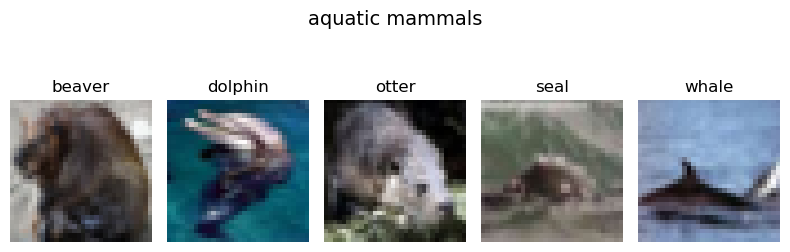

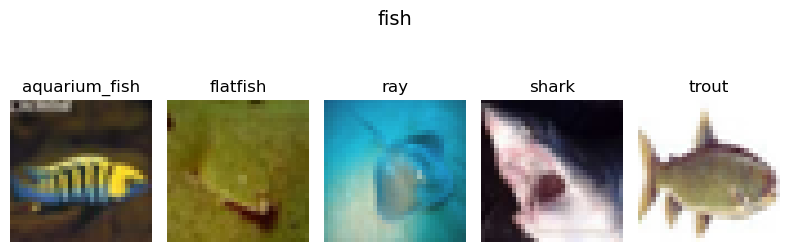

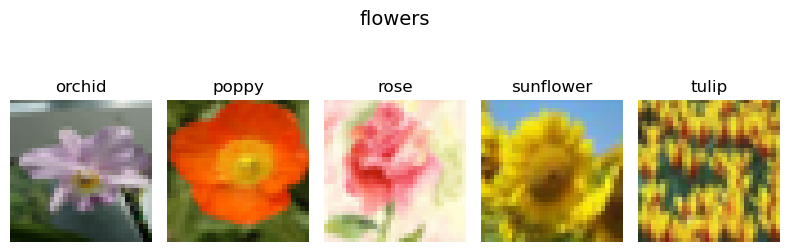

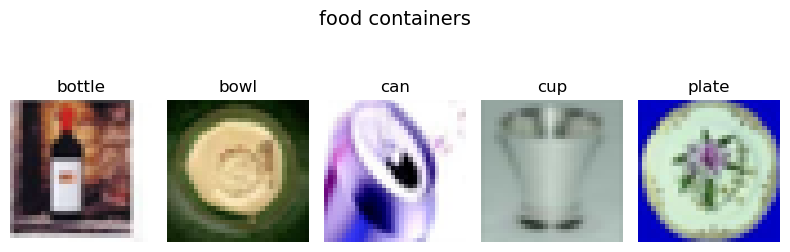

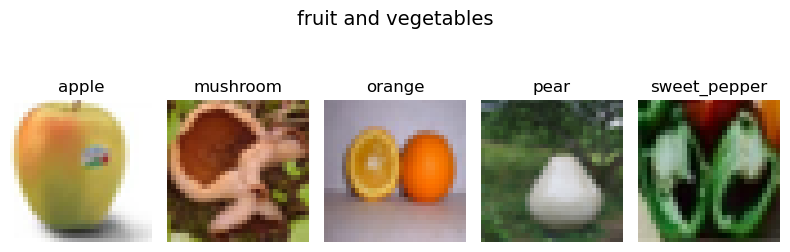

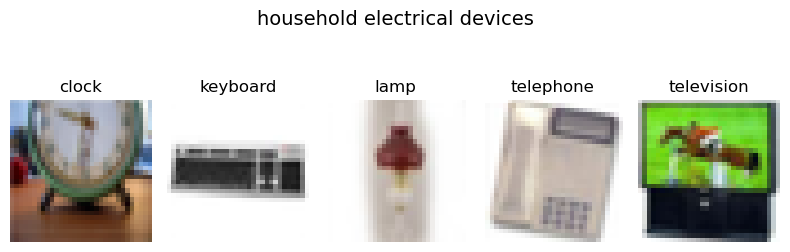

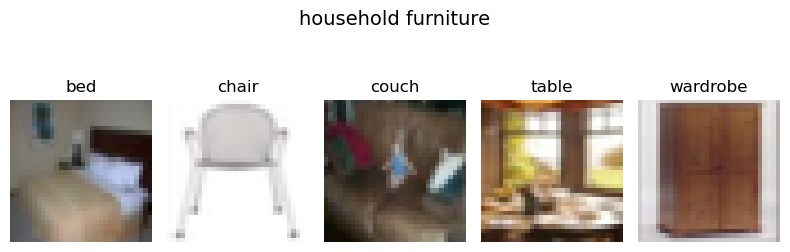

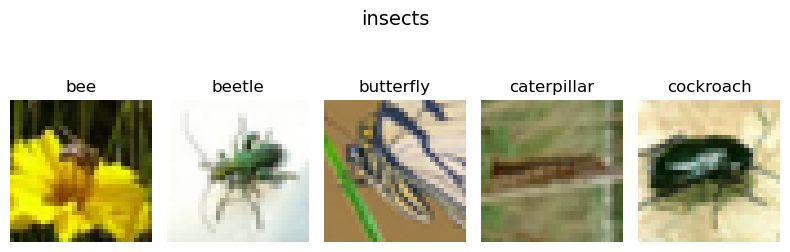

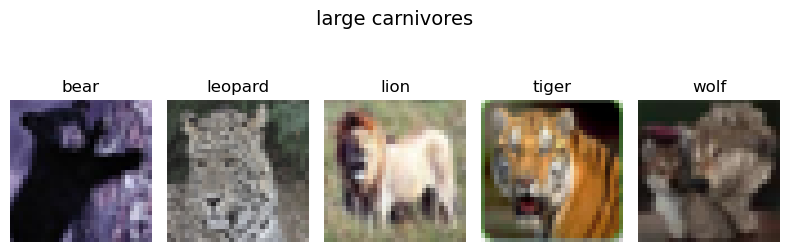

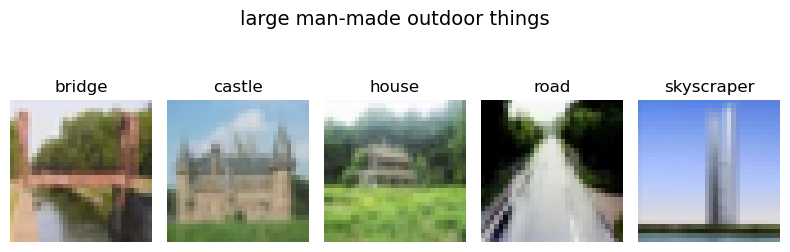

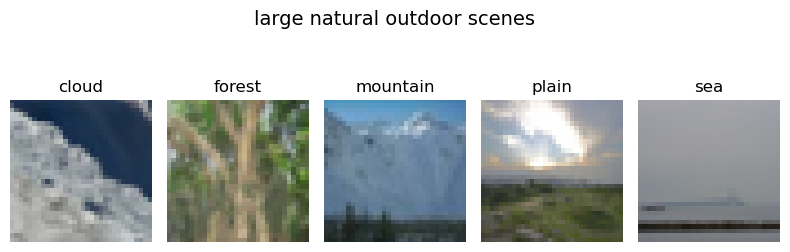

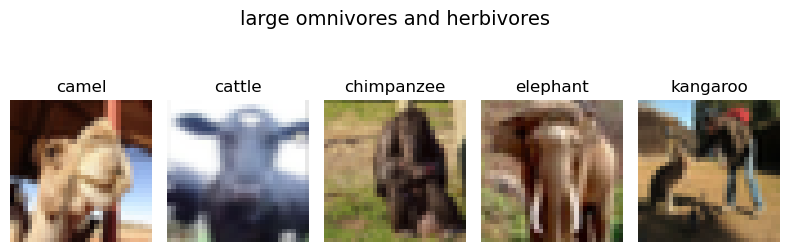

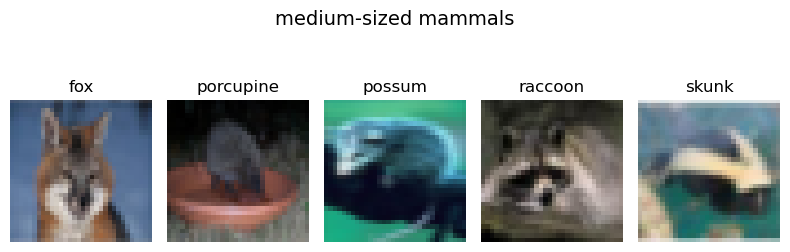

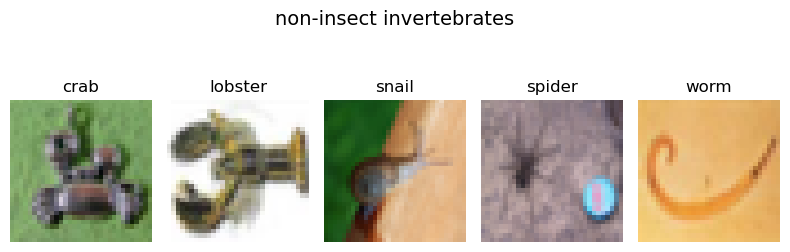

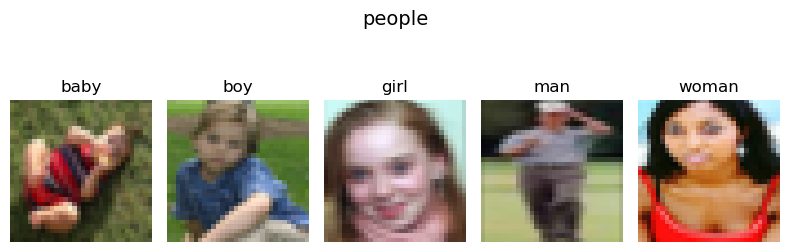

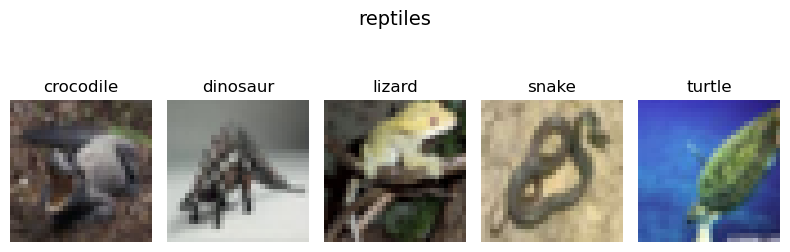

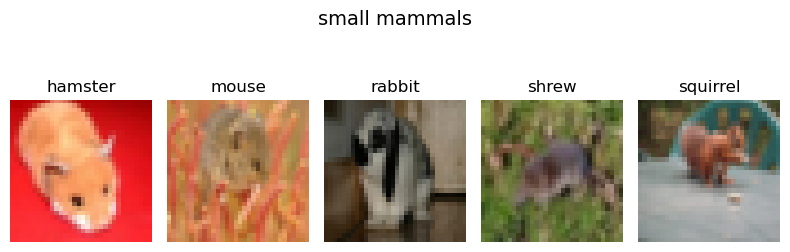

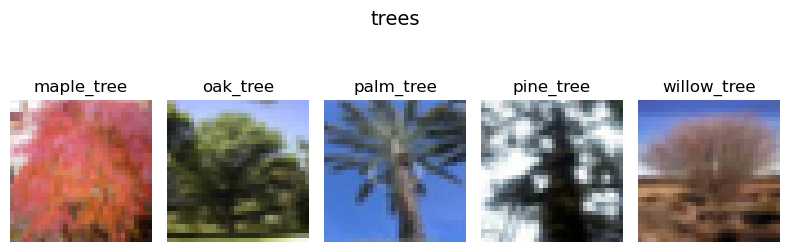

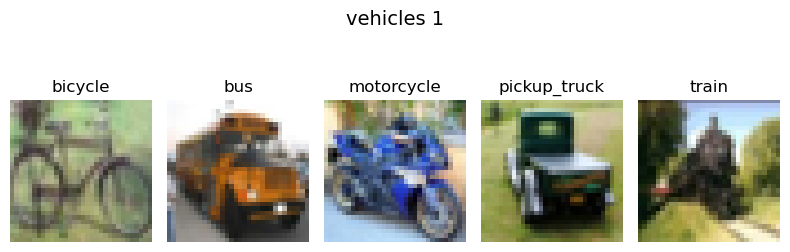

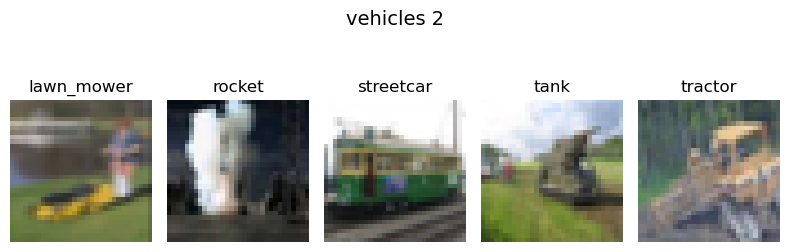

In [42]:
import random

def visualize_cifar100_dataset(dataset, superclasses, subclass_indices):
    """
    Visualize CIFAR-100 superclasses and their corresponding subclasses.

    Parameters:
    - dataset: The CIFAR-100 dataset
    - superclasses: Dictionary of superclasses and their corresponding subclasses
    - subclass_indices: Dictionary of superclasses and their corresponding indices
    - num_images: Number of images to display per subclass (default is 1)
    """

    # Loop through each superclass
    for superclass, subclasses in superclasses.items():

        num_subclasses = len(subclasses)
        fig, axes = plt.subplots(1, num_subclasses, figsize=(8, 3))
        fig.suptitle(superclass, fontsize=14)

        # Superclass index
        subclass_index = subclass_indices[superclass]
        
        # Loop through each subclass
        for i, subclass_name in enumerate(subclasses):

            # Randomly select an image
            images = [(img, label) for img, label in dataset if label == subclass_index[i]]
            image, _ = random.choice(images)
            image = np.interp(image.numpy(), (-1, 1), (0, 255)).astype(np.uint8).transpose((1, 2, 0))
            
            ax = axes[i]
            ax.imshow(image)
            ax.set_title(subclass_name)
            ax.axis('off')
    
        plt.tight_layout()
        plt.show()

visualize_cifar100_dataset(train_set, superclasses, superclass_to_indices)

<a id="section-3"></a>
### **Section 3: TwoLayerNet Architecture (2 points)**

In this section, you will implement the architecture of a fully connected neural network called `TwoLayerNet`, consisting of two fully connected layers with a ReLU activation in between. The network accepts an input size of 3x32x32 (CIFAR-100 image), a specified hidden layer size, and the number of output classes. In the `__init__` method, define the first fully connected layer that maps the input size to the hidden size, and the second fully connected layer that maps the hidden size to the number of classes. 

Ensure to call the parent class constructor using `super(TwoLayerNet, self).__init__()`. In the `forward` method, flatten the input tensor, pass it through the first layer with ReLU activation, and then through the second layer to obtain the final scores.

**Note:** You are allowed to modify the provided function definitions as needed.

In [3]:
class TwoLayerNet(nn.Module):

    def __init__(self, input_size, hidden_size, num_classes):
        '''
        Initializes the two-layer neural network model.

        Args:
            input_size (int): The size of the input features.
            hidden_size (int): The size of the hidden layer.
            num_classes (int): The number of classes in the dataset.
        '''

        super(TwoLayerNet, self).__init__()

        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, num_classes)
        self.activation = nn.ReLU()
        self.flatten = nn.Flatten()

    def forward(self, x):
        '''
        Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            torch.Tensor: The output tensor.
        '''

        a1 = self.activation(self.layer1(self.flatten(x)))
        output = self.layer2(a1)
        
        return output

<a id="section-4"></a>
### **Section 4: ConvNet Architecture (2 points)**

In this section, you will implement a convolutional neural network inspired by the structure of [LeNet-5](https://ieeexplore.ieee.org/document/726791). The network processes color images using three convolutional layers followed by two fully connected layers. Since you need to feed color images into this network, determine the kernel size of the first convolutional layer. Additionally, calculate the number of trainable parameters in the "F6" layer, providing the calculation process.

In [4]:
class ConvNet(nn.Module):

    def __init__(self, num_classes):
        '''	
        Initializes the convolutional neural network model.

        Args:
            None
        '''

        super(ConvNet, self).__init__()

        # based on the LeNet-5 architecture
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding='valid') # 32x32x3 --> 28x28x6
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding='valid') # 14x14x6 --> 10x10x16

        self.avg_pooling = nn.AvgPool2d(kernel_size=2) # 28x28x6 --> 14x14x6, 10x10x16 --> 5x5x16
        self.activation = nn.Tanh()
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(in_features=400, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=num_classes)

    def forward(self, x):
        '''
        Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            torch.Tensor: The output tensor.
        '''

        a1 = self.avg_pooling(self.activation(self.conv1(x)))
        a2 = self.avg_pooling(self.activation(self.conv2(a1)))
        fc1 = self.fc1(self.flatten(a2))
        fc2 = self.fc2(fc1)
        output = self.fc3(fc2)
        
        return output
    
model = ConvNet(num_classes=100)

# number of trainable parameters in the model
fc2_params = sum(p.numel() for p in model.fc2.parameters() if p.requires_grad)
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Trainable parameters in the last layer: {fc2_params}")
print(f"Total trainable parameters in the model: {total_params}")

Trainable parameters in the last layer: 10164
Total trainable parameters in the model: 69656


<a id="section-5"></a>
### **Section 5: Preparation of Training (7 points)**

In this section, you will create a custom dataset class to load the CIFAR-100 data, define a transform function for data augmentation, and set up an optimizer for training. While the previous section utilized the built-in CIFAR-100 class from `torchvision`, in practice, you often need to prepare datasets manually. Here, you will implement the `CIFAR100_loader` class to handle the dataset and use `DataLoader` to make it iterable. You will also define a transform function for data augmentation and an optimizer for updating the model's parameters.

In [5]:
class CIFAR100_loader(Dataset):
    
    def __init__(self, root, train=True, transform=None, download=False):
        '''
        Initializes the CIFAR-100 dataset loader.

        Args:
            root (str): The root directory to store the dataset.
            train (bool): If True, loads the training data; otherwise, loads the test data.
            transform (callable, optional): The data transformations to apply.
            download (bool): If True, downloads the dataset if it is not already available.
        '''

        super(CIFAR100_loader, self).__init__()

        self.data = torchvision.datasets.CIFAR100(root=root, train=train, download=download)
        self.transform = transform if transform is not None else transforms.ToTensor()

    def __len__(self):
        '''
        Returns the number of samples in the dataset.

        Returns:
            int: The number of samples in the dataset.
        '''

        return len(self.data)

    def __getitem__(self, idx):
        '''
        Retrieves a sample from the dataset at the specified index.

        Args:
            idx (int): The index of the sample to retrieve.

        Returns:
            tuple: A tuple containing the image and label tensors.
        '''

        img, label = self.data[idx]

        if self.transform:
            img = self.transform(img)
        
        return img, label

In [33]:
def create_transforms(is_test_set=False):
    '''
    Creates the data transformations for the CIFAR-100 dataset.

    Returns:
        torchvision.transforms.Compose: The data transformations for the dataset.
    '''

    if is_test_set:
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        ])
    else:
        transform = transforms.Compose([
            transforms.RandomHorizontalFlip(),
            transforms.RandomRotation(10),
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        ])

    return transform

In [7]:
def create_optimizer(model, learning_rate=0.001):
    '''
    Creates an optimizer for the model.

    Args:
        model (torch.nn.Module): The neural network model.
        learning_rate (float): The learning rate for the optimizer.

    Returns:
        torch.optim.Adam: The optimizer for the model.
    '''

    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    return optimizer

<a id="section-6"></a>
### **Section 6: Training the Networks (5 points)**

In this section, you will complete the `train` function and use it to train both the `TwoLayerNet` and `ConvNet` models. You will use the custom `CIFAR100_loader`, transform function, and optimizer function that you implemented. The goal is to compare the performance of the two models on the CIFAR-100 dataset.

In [8]:
def validate(net, testloader):
    '''
    Validates the model on the test dataset.

    Args:
        net (torch.nn.Module): The neural network model.
        testloader (torch.utils.data.DataLoader): The data loader for the test dataset.

    Returns:
        float: The accuracy of the model on the test dataset.
    '''

    # Set the model to evaluation mode
    net.eval()

    # Determine the device to run the model on
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    correct, total = 0, 0

    # Disable gradient computation
    with torch.no_grad():

        # Iterate over the test dataset
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy of the network on the test images: {accuracy:.2f} %')

    return accuracy

In [9]:
def validate_per_class(net, testloader, classes):
    '''
    Validates the model on the test dataset per class.

    Args:
        net (torch.nn.Module): The neural network model.
        testloader (torch.utils.data.DataLoader): The data loader for the test dataset.
        classes (tuple): The tuple of class names.

    Returns:
        None
    '''

    # Set the model to evaluation mode
    net.eval()

    # Determine the device to run the model on
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    class_correct = [0. for _ in range(len(classes))]
    class_total = [0. for _ in range(len(classes))]

    # Disable gradient computation
    with torch.no_grad():

        # Iterate over the test dataset
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            correct_predictions = (predicted == labels).squeeze()

            for i in range(len(labels)):
                label = labels[i]
                class_correct[label] += correct_predictions[i].item()
                class_total[label] += 1

    for i, class_name in enumerate(classes):
        accuracy = 100 * class_correct[i] / class_total[i] if class_total[i] > 0 else 0
        print(f'Accuracy of {class_name:5s} : {accuracy:.2f} %')

In [10]:
def train(net, train_loader, criterion, optimizer, epochs=100):
    '''
    Trains the neural network model.

    Args:
        net (torch.nn.Module): The neural network model.
        train_loader (torch.utils.data.DataLoader): The data loader for the training dataset.
        criterion (torch.nn.Module): The loss function.
        optimizer (torch.optim.Optimizer): The optimizer for the model.
        epochs (int): The number of epochs to train the model.

    Returns:
        None
    '''
    net.train()

    for epoch in range(epochs):

        total_loss = 0.0
        correct, total = 0, 0

        for data in train_loader:

            inputs, labels = data
            inputs, labels = inputs.to(net.device), labels.to(net.device)         

            # Forward and loss
            outputs = net(inputs)
            loss = criterion(outputs, labels)

            # Backpropagation and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Sum losses of each batch
            total_loss += loss.item()

            # Calculate accuracy
            with torch.no_grad():
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total

        # Print epoch statistics
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {total_loss / len(train_loader):.4f}, Accuracy: {accuracy:.2f} %")

First, initialize the datasets and data loaders for both models.

In [34]:
root = './data'

# set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# set the transform
train_transform = create_transforms()
test_transform = create_transforms(is_test_set=True)

# create the data loaders
train_dataset = CIFAR100_loader(root=root, train=True, transform=train_transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = CIFAR100_loader(root=root, train=False, transform=test_transform, download=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


Next, train the TwoLayerNet model on the CIFAR-100 dataset using the training data loader.

In [12]:
epochs = 15
learning_rate = 0.001

# Create the model
two_layer_net = TwoLayerNet(input_size=32 * 32 * 3, hidden_size=1024, num_classes=100)

# Device to train the model on
two_layer_net.to(device)
two_layer_net.device = device

# create the loss function
criterion = nn.CrossEntropyLoss()
criterion = criterion.to(two_layer_net.device)

# Optimizer for the model
optimizer_two_layer_net = create_optimizer(two_layer_net, learning_rate=learning_rate)

# Train the model
print("Training started...")
train(two_layer_net, train_loader, criterion, optimizer_two_layer_net, epochs=epochs)

torch.save(two_layer_net.state_dict(), 'models/two_layer_net.pth')

Training started...
Epoch [1/15], Loss: 3.9136, Accuracy: 13.42 %
Epoch [2/15], Loss: 3.6112, Accuracy: 18.97 %
Epoch [3/15], Loss: 3.4861, Accuracy: 21.03 %
Epoch [4/15], Loss: 3.4182, Accuracy: 22.88 %
Epoch [5/15], Loss: 3.3566, Accuracy: 23.94 %
Epoch [6/15], Loss: 3.3031, Accuracy: 25.14 %
Epoch [7/15], Loss: 3.2628, Accuracy: 25.62 %
Epoch [8/15], Loss: 3.2164, Accuracy: 26.35 %
Epoch [9/15], Loss: 3.1922, Accuracy: 27.22 %
Epoch [10/15], Loss: 3.1597, Accuracy: 27.68 %
Epoch [11/15], Loss: 3.1177, Accuracy: 28.27 %
Epoch [12/15], Loss: 3.1001, Accuracy: 28.61 %
Epoch [13/15], Loss: 3.0944, Accuracy: 28.89 %
Epoch [14/15], Loss: 3.0543, Accuracy: 29.32 %
Epoch [15/15], Loss: 3.0514, Accuracy: 29.82 %


In [35]:
# Evaluate performance on the test set
two_layer_net = TwoLayerNet(input_size=32 * 32 * 3, hidden_size=1024, num_classes=100)

# Device to train the model on
two_layer_net.to(device)
two_layer_net.device = device

two_layer_net.load_state_dict(torch.load('models/two_layer_net.pth', weights_only=False))
model.eval()

print("Validating model on test data:")
accuracy = validate(two_layer_net, test_loader)

# print("Per-class accuracy for model:")
# validate_per_class(two_layer_net, test_loader, classes)

Validating model on test data:
Accuracy of the network on the test images: 22.49 %


Finally, train the ConvNet model on the CIFAR-100 dataset using the training data loader.

In [14]:
epochs = 15
learning_rate = 0.001

# Create the model
conv_net = ConvNet(num_classes=100)

# Device to train the model on
conv_net.to(device)
conv_net.device = device

# create the loss function
criterion = nn.CrossEntropyLoss()
criterion = criterion.to(conv_net.device)

# Optimizer for the model
optimizer_conv_net = create_optimizer(conv_net, learning_rate=learning_rate)

# Train the model
print("Training started...")
train(conv_net, train_loader, criterion, optimizer_conv_net, epochs=epochs)

torch.save(conv_net.state_dict(), 'models/conv_net.pth')

Training started...
Epoch [1/15], Loss: 3.8851, Accuracy: 11.52 %
Epoch [2/15], Loss: 3.6048, Accuracy: 16.43 %
Epoch [3/15], Loss: 3.5138, Accuracy: 17.89 %
Epoch [4/15], Loss: 3.4533, Accuracy: 18.82 %
Epoch [5/15], Loss: 3.3963, Accuracy: 19.99 %
Epoch [6/15], Loss: 3.3275, Accuracy: 21.13 %
Epoch [7/15], Loss: 3.2693, Accuracy: 22.27 %
Epoch [8/15], Loss: 3.2213, Accuracy: 22.85 %
Epoch [9/15], Loss: 3.1808, Accuracy: 23.59 %
Epoch [10/15], Loss: 3.1453, Accuracy: 24.45 %
Epoch [11/15], Loss: 3.1186, Accuracy: 25.03 %
Epoch [12/15], Loss: 3.0887, Accuracy: 25.56 %
Epoch [13/15], Loss: 3.0619, Accuracy: 26.16 %
Epoch [14/15], Loss: 3.0381, Accuracy: 26.47 %
Epoch [15/15], Loss: 3.0146, Accuracy: 27.08 %


In [36]:
# Evaluate performance on the test set
conv_net = ConvNet(num_classes=100)

# Device to train the model on
conv_net.to(device)
conv_net.device = device

conv_net.load_state_dict(torch.load('models/conv_net.pth', weights_only=False))
model.eval()

print("Validating model on test data:")
accuracy = validate(conv_net, test_loader)

# print("Per-class accuracy for model:")
# validate_per_class(conv_net, test_loader, classes)

Validating model on test data:
Accuracy of the network on the test images: 26.14 %


<a id="section-7"></a>
### **Section 7: Setting Up the Hyperparameters (14 points)**

In this section, you will experiment with both the `ConvNet` and `TwoLayerNet` models by setting up and tuning the hyperparameters to achieve the highest possible accuracy. You have the flexibility to modify the training process, including the `train` function, `DataLoader`, `transform` functions, and optimizer as needed.

1. Adjust the hyperparameters, including learning rate, batch size, number of epochs, optimizer, weight decay, and transform function to improve the performance of both networks. Modify the training procedure and architecture as necessary. You can also add components like Batch Normalization layers.
2. Add two more layers to both `TwoLayerNet` and `ConvNet`. You can decide the size and placement of these layers. Evaluate if these changes result in higher performance and explain your findings.
3. Show the final results and describe the modifications made to enhance performance. Discuss the impact of hyperparameter tuning on both `TwoLayerNet` and `ConvNet`.
4. Compare the two networks in terms of architecture, performance, and learning rates. Provide a detailed explanation of the differences observed.

**Note:** Do not use external pre-trained networks and limit additional convolutional layers to a maximum of three beyond the original architecture.

Steps followed:

1. Created new models (TwoLayerNetWithBN and ConvNetWithBN) by adding batch normalization layers to the original architectures.
2. Tuned the hyperparameters for the new models using the Optuna package. 
3. Found the best learning rate, batch size, number of epochs, optimizer, alpha value for weight decay and a scheduler to accomodate the learning rate properly. The optimizer also had its own parameters optimized. Also added a small validatition dataset to analyze after each epoch. 
4. Trained these two new models using the best hyperparameters found to see how much they improved over the originals.
5. Created two new models (TwoLayerNetImproved and ConvNetImproved), based on the original ones, by adding more layers (2 Linear or 3 Convolutional), batch normalization, max pooling, dropout, skip connections and a better activation function.
6. Trained these final models using similar hyperparameters to the ones found before to see how much they improved.

In [43]:
### Create the network models with batch normalization ###

class TwoLayerNetWithBN(nn.Module):

    def __init__(self, input_size, hidden_size, num_classes):
        '''
        Initializes the two-layer neural network model.

        Args:
            input_size (int): The size of the input features.
            hidden_size (int): The size of the hidden layer.
            num_classes (int): The number of classes in the dataset.
        '''

        super(TwoLayerNetWithBN, self).__init__()

        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, num_classes)
        self.activation = nn.ReLU()
        self.flatten = nn.Flatten()
        self.batch_norm1 = nn.BatchNorm1d(hidden_size)

    def forward(self, x):
        '''
        Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            torch.Tensor: The output tensor.
        '''

        a1 = self.activation(self.batch_norm1(self.layer1(self.flatten(x))))
        output = self.layer2(a1)
        
        return output
    

class ConvNetWithBN(nn.Module):

    def __init__(self, num_classes):
        '''	
        Initializes the convolutional neural network model.

        Args:
            None
        '''

        super(ConvNetWithBN, self).__init__()

        # based on the LeNet-5 architecture
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding='valid') # 32x32x3 --> 28x28x6
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding='valid') # 14x14x6 --> 10x10x16

        self.avg_pooling = nn.AvgPool2d(kernel_size=2) # 28x28x6 --> 14x14x6, 10x10x16 --> 5x5x16
        self.activation = nn.ReLU()

        self.batch_norm1 = nn.BatchNorm2d(6)
        self.batch_norm2 = nn.BatchNorm2d(16)
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(in_features=400, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=num_classes)

    def forward(self, x):
        '''
        Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            torch.Tensor: The output tensor.
        '''

        a1 = self.avg_pooling(self.activation(self.batch_norm1(self.conv1(x))))
        a2 = self.avg_pooling(self.activation(self.batch_norm2(self.conv2(a1))))
        fc1 = self.fc1(self.flatten(a2))
        fc2 = self.fc2(fc1)
        output = self.fc3(fc2)
        
        return output

In [ ]:
### Tune the hyperparameters ###

import optuna

def evaluate_on_dataset(net, dataLoader, include_loss=False):
    '''
    Validates the model on the test dataset.

    Args:
        net (torch.nn.Module): The neural network model.
        dataLoader (torch.utils.data.DataLoader): The data loader for the test dataset.

    Returns:
        float: The accuracy of the model on the test dataset.
    '''

    # Set the model to evaluation mode
    net.eval()

    # Determine the device to run the model on
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    correct, total = 0, 0

    if include_loss:
        val_loss = 0.0

    # Disable gradient computation
    with torch.no_grad():

        # Iterate over the test dataset
        for data in dataLoader:

            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = net(inputs)

            if include_loss:
                val_loss += criterion(outputs, labels).item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total

    if include_loss:
        return accuracy, val_loss

    return accuracy

# Training function
def train_and_evaluate(model, train_loader, val_loader, test_loader, criterion, optimizer, scheduler, epochs=10):
    
    for _ in range(epochs):

        model.train()

        total_loss = 0.0

        for data in train_loader:

            inputs, labels = data
            inputs, labels = inputs.to(model.device), labels.to(model.device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        if scheduler and isinstance(scheduler, torch.optim.lr_scheduler.ReduceLROnPlateau):
            _, val_loss = evaluate_on_dataset(model, val_loader, include_loss=True)
            scheduler.step(val_loss / len(val_loader))
        elif scheduler:
            scheduler.step()
    
    # Evaluate the model on the test set
    return evaluate_on_dataset(model, test_loader)

# Optuna Objective function
def objective(trial, model_type):
    # Hyperparameters to be tuned
    learning_rate = trial.suggest_categorical('learning_rate', [1e-4, 1e-3, 1e-2])
    weight_decay = trial.suggest_categorical('weight_decay', [1e-5, 1e-4, 1e-3])
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])
    epochs = trial.suggest_int('epochs', 5, 25, step=5)

    # Set up the device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    if model_type == 'conv_net':
        model = ConvNetWithBN(100)
    elif model_type == 'two_layer_net':
        hidden_size = trial.suggest_int('hidden_size', 128, 1024, step=128)
        model = TwoLayerNetWithBN(32 * 32 * 3, hidden_size, 100)

    model.to(device)
    model.device = device

    # set the transform
    train_transform = create_transforms()
    test_transform = create_transforms(is_test_set=True)

    # load CIFAR-100 data
    train_dataset = CIFAR100_loader(root='./data', train=True, transform=train_transform, download=True)
    test_dataset = CIFAR100_loader(root='./data', train=False, transform=test_transform, download=True)

    train_size = int(0.9 * len(train_dataset))
    train_subset, val_subset = random_split(train_dataset, [train_size, len(train_dataset) - train_size])

    # set the data loaders
    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    validation_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss().to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    # Learning rate scheduler options
    scheduler_type = trial.suggest_categorical('scheduler_type', ['None', 'StepLR', 'ReduceLROnPlateau'])

    if scheduler_type == 'StepLR':
        step_size = trial.suggest_categorical('step_size', [10, 15])
        gamma = trial.suggest_float('gamma', 0.1, 0.9)
        scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=gamma)
    elif scheduler_type == 'ReduceLROnPlateau':
        patience = trial.suggest_categorical('patience', [5, 10])
        lr_factor = trial.suggest_float('lr_factor', 0.1, 0.9)
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=lr_factor, patience=patience)
    else:
        scheduler = None

    # Train and evaluate the model
    accuracy = train_and_evaluate(model, train_loader, validation_loader, test_loader, criterion, optimizer, scheduler, epochs)
    return accuracy

In [ ]:
### Optimize for TwoLayerNet ###

# This cells takes up to 90 minutes to run. The result obtanied is provided below.

two_layer_study = optuna.create_study(direction='maximize')
two_layer_study.optimize(lambda trial: objective(trial, 'two_layer_net'), n_trials=40)

best_params_two_layer = two_layer_study.best_params
print(f"Best hyperparameters for TwoLayerNet: {best_params_two_layer}")

# Best hyperparameters for TwoLayerNet: {'learning_rate': 0.001, 'weight_decay': 1e-05, 'batch_size': 64, 'epochs': 20, 'hidden_size': 768, 'scheduler_type': 'ReduceLROnPlateau', 'patience': 5, 'lr_factor': 0.30025677479207347}

In [ ]:
### Optimize for ConvNet ###

# This cells takes up to 90 minutes to run. The result obtanied is provided below.

conv_net_study = optuna.create_study(direction='maximize')
conv_net_study.optimize(lambda trial: objective(trial, 'conv_net'), n_trials=40)

# Get the best hyperparameters
best_params_conv_net = conv_net_study.best_params
print(f"Best hyperparameters for ConvNet: {best_params_conv_net}")

# Best hyperparameters for ConvNet: {'learning_rate': 0.001, 'weight_decay': 0.0001, 'batch_size': 64, 'epochs': 25, 'scheduler_type': 'ReduceLROnPlateau', 'patience': 5, 'lr_factor': 0.28991373146096105}.

In [44]:
### Train both models with the best hyperparameters found ###

root = './data'

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_transform = create_transforms()
test_transform = create_transforms(is_test_set=True)

train_dataset = CIFAR100_loader(root=root, train=True, transform=train_transform, download=True)
test_dataset = CIFAR100_loader(root=root, train=False, transform=test_transform, download=True)

train_size = int(0.9 * len(train_dataset))
train_subset, val_subset = random_split(train_dataset, [train_size, len(train_dataset) - train_size])


def new_create_optimizer(model, learning_rate=0.001, weight_decay=1e-4, lr_factor=0.1, patience=5):
    '''
    Creates an optimizer for the model.

    Args:
        model (torch.nn.Module): The neural network model.
        learning_rate (float): The learning rate for the optimizer.

    Returns:
        torch.optim.Adam: The optimizer for the model.
    '''

    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=lr_factor, patience=patience)
    return optimizer, scheduler

def new_validate(net, dataLoader, validation=False):
    '''
    Validates the model on the test dataset.

    Args:
        net (torch.nn.Module): The neural network model.
        dataLoader (torch.utils.data.DataLoader): The data loader for the test dataset.

    Returns:
        float: The accuracy of the model on the test dataset.
    '''

    # Set the model to evaluation mode
    net.eval()

    # Determine the device to run the model on
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    correct, total = 0, 0

    if validation:
        val_loss = 0.0

    # Disable gradient computation
    with torch.no_grad():

        # Iterate over the test dataset
        for inputs, labels in dataLoader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            if validation:
                val_loss += criterion(outputs, labels).item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total

    if validation:
        return accuracy, val_loss

    print(f'Accuracy of the network on the test images: {accuracy:.2f} %')

    return accuracy

def new_train(net, train_loader, validation_loader, criterion, optimizer, scheduler, epochs=100):
    '''
    Trains the neural network model.

    Args:
        net (torch.nn.Module): The neural network model.
        train_loader (torch.utils.data.DataLoader): The data loader for the training dataset.
        criterion (torch.nn.Module): The loss function.
        optimizer (torch.optim.Optimizer): The optimizer for the model.
        scheduler (torch.optim.lr_scheduler): The learning rate scheduler.
        epochs (int): The number of epochs to train the model.

    Returns:
        None
    '''

    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    for epoch in range(epochs):

        net.train()

        total_loss = 0.0
        correct, total = 0, 0

        for data in train_loader:

            inputs, labels = data
            inputs, labels = inputs.to(net.device), labels.to(net.device)         

            # Forward and loss
            outputs = net(inputs)
            loss = criterion(outputs, labels)

            # Backpropagation and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Sum losses of each batch
            total_loss += loss.item()

            # Calculate accuracy
            with torch.no_grad():
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        train_accuracy = 100 * correct / total
        train_losses.append(total_loss / len(train_loader))
        train_accuracies.append(train_accuracy)  

        # Now updating the learning rate
        if scheduler and isinstance(scheduler, torch.optim.lr_scheduler.ReduceLROnPlateau):
            val_accuracy, val_loss = new_validate(net, validation_loader, validation=True)
            val_losses.append(val_loss / len(validation_loader))
            val_accuracies.append(val_accuracy)
            scheduler.step(val_loss / len(validation_loader))
        elif scheduler:
            scheduler.step()

        # Print epoch statistics
        current_lr = optimizer.param_groups[0]['lr']
        print(f"""Epoch [{epoch + 1}/{epochs}], Loss: {total_loss / len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%, LR: {current_lr:.5f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%""")

    return train_accuracies, train_losses, val_accuracies, val_losses

Files already downloaded and verified
Files already downloaded and verified


In [18]:
batch_size = 64
epochs = 20
hidden_size = 768
learning_rate = 0.001
weight_decay = 1e-5
lr_factor = 0.3
patience = 5

train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
validation_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

two_layer_net = TwoLayerNetWithBN(input_size=32 * 32 * 3, hidden_size=hidden_size, num_classes=100)
two_layer_net.to(device)
two_layer_net.device = device

criterion = nn.CrossEntropyLoss()
criterion = criterion.to(two_layer_net.device)

optimizer_two_layer_net, scheduler = new_create_optimizer(two_layer_net, learning_rate=learning_rate, weight_decay=weight_decay, lr_factor=lr_factor, patience=patience)

print("Training started...")
_, _, _, _ = new_train(two_layer_net, train_loader, validation_loader, criterion, optimizer_two_layer_net, scheduler, epochs=epochs)

torch.save(two_layer_net.state_dict(), 'models/two_layer_net_with_bn.pth')

Training started...
Epoch [1/20], Loss: 3.7605, Accuracy: 13.79%, LR: 0.00100, Val Loss: 281.4648, Val Accuracy: 17.22%
Epoch [2/20], Loss: 3.4110, Accuracy: 19.51%, LR: 0.00100, Val Loss: 265.6928, Val Accuracy: 20.44%
Epoch [3/20], Loss: 3.2532, Accuracy: 22.50%, LR: 0.00100, Val Loss: 260.0040, Val Accuracy: 22.34%
Epoch [4/20], Loss: 3.1396, Accuracy: 24.60%, LR: 0.00100, Val Loss: 254.7826, Val Accuracy: 23.78%
Epoch [5/20], Loss: 3.0518, Accuracy: 26.40%, LR: 0.00100, Val Loss: 251.4621, Val Accuracy: 24.64%
Epoch [6/20], Loss: 2.9804, Accuracy: 27.52%, LR: 0.00100, Val Loss: 248.0054, Val Accuracy: 25.48%
Epoch [7/20], Loss: 2.9095, Accuracy: 29.26%, LR: 0.00100, Val Loss: 247.5837, Val Accuracy: 26.06%
Epoch [8/20], Loss: 2.8556, Accuracy: 30.03%, LR: 0.00100, Val Loss: 243.9091, Val Accuracy: 26.94%
Epoch [9/20], Loss: 2.8069, Accuracy: 30.96%, LR: 0.00100, Val Loss: 243.1611, Val Accuracy: 26.36%
Epoch [10/20], Loss: 2.7566, Accuracy: 32.03%, LR: 0.00100, Val Loss: 241.7279, 

In [38]:
# Evaluate performance on the test set
two_layer_net = TwoLayerNetWithBN(input_size=32 * 32 * 3, hidden_size=768, num_classes=100)

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Device to train the model on
two_layer_net.to(device)
two_layer_net.device = device

two_layer_net.load_state_dict(torch.load('models/two_layer_net_with_bn.pth', weights_only=False))
model.eval()

print("Validating model on test data:")
accuracy = new_validate(two_layer_net, test_loader)

# print("Per-class accuracy for model:")
# validate_per_class(two_layer_net, test_loader, classes)

Validating model on test data:
Accuracy of the network on the test images: 30.06 %


In [45]:
batch_size = 128
epochs = 25
learning_rate = 0.001
weight_decay = 1e-4
lr_factor = 0.29
patience = 5

train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
validation_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

conv_net = ConvNetWithBN(num_classes=100)
conv_net.to(device)
conv_net.device = device

criterion = nn.CrossEntropyLoss()
criterion = criterion.to(conv_net.device)

optimizer_conv_net, scheduler = new_create_optimizer(conv_net, learning_rate=learning_rate, weight_decay=weight_decay, lr_factor=lr_factor, patience=patience)

print("Training started...")
_, _, _, _ = new_train(conv_net, train_loader, validation_loader, criterion, optimizer_conv_net, scheduler, epochs=epochs)

torch.save(conv_net.state_dict(), 'models/conv_net_with_bn.pth')

Training started...
Epoch [1/25], Loss: 3.8139, Accuracy: 11.96%, LR: 0.00100, Val Loss: 138.6141, Val Accuracy: 17.22%
Epoch [2/25], Loss: 3.3811, Accuracy: 18.83%, LR: 0.00100, Val Loss: 131.3264, Val Accuracy: 19.10%
Epoch [3/25], Loss: 3.2249, Accuracy: 22.10%, LR: 0.00100, Val Loss: 125.4920, Val Accuracy: 23.10%
Epoch [4/25], Loss: 3.1321, Accuracy: 23.90%, LR: 0.00100, Val Loss: 122.7782, Val Accuracy: 24.58%
Epoch [5/25], Loss: 3.0626, Accuracy: 25.14%, LR: 0.00100, Val Loss: 123.2685, Val Accuracy: 24.76%
Epoch [6/25], Loss: 3.0175, Accuracy: 26.26%, LR: 0.00100, Val Loss: 119.8472, Val Accuracy: 26.24%
Epoch [7/25], Loss: 2.9743, Accuracy: 27.08%, LR: 0.00100, Val Loss: 118.7733, Val Accuracy: 27.48%
Epoch [8/25], Loss: 2.9336, Accuracy: 27.91%, LR: 0.00100, Val Loss: 117.9824, Val Accuracy: 27.36%
Epoch [9/25], Loss: 2.9111, Accuracy: 28.33%, LR: 0.00100, Val Loss: 117.6592, Val Accuracy: 27.88%
Epoch [10/25], Loss: 2.8841, Accuracy: 29.06%, LR: 0.00100, Val Loss: 116.8564, 

In [46]:
# Evaluate performance on the test set
conv_net = ConvNetWithBN(num_classes=100)

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Device to train the model on
conv_net.to(device)
conv_net.device = device

conv_net.load_state_dict(torch.load('models/conv_net_with_bn.pth', weights_only=False))
model.eval()

print("Validating model on test data:")
accuracy = validate(conv_net, test_loader)

# print("Per-class accuracy for model:")
# validate_per_class(conv_net, test_loader, classes)

Validating model on test data:
Accuracy of the network on the test images: 33.01 %


In [23]:
### Create the new network models with extra layers and processes ###

class TwoLayerNetImproved(nn.Module):

    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, num_classes):
        '''
        Initializes the two-layer neural network model.

        Args:
            input_size (int): The size of the input features.
            hidden_size (int): The size of the hidden layer.
            num_classes (int): The number of classes in the dataset.
        '''

        super(TwoLayerNetImproved, self).__init__()

        self.layer1 = nn.Linear(input_size, hidden_size1)
        self.layer2 = nn.Linear(hidden_size1, hidden_size2)
        self.layer3 = nn.Linear(hidden_size2, hidden_size3)
        self.layer4 = nn.Linear(hidden_size3, num_classes)

        self.activation = nn.LeakyReLU(negative_slope=0.01)
        self.dropout1 = nn.Dropout(p=0.2)
        
        self.batch_norm1 = nn.BatchNorm1d(hidden_size1)
        self.batch_norm2 = nn.BatchNorm1d(hidden_size2)
        self.batch_norm3 = nn.BatchNorm1d(hidden_size3)

        self.flatten = nn.Flatten()

    def forward(self, x):
        '''
        Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            torch.Tensor: The output tensor.
        '''

        a1 = self.activation(self.batch_norm1(self.layer1(self.flatten(x))))
        a1 = self.dropout1(a1)
        a2 = self.activation(self.batch_norm2(self.layer2(a1)))
        a2 = self.dropout1(a2)
        a3 = self.activation(self.batch_norm3(self.layer3(a2)))
        a3 = self.dropout1(a3)
        output = self.layer4(a3)
        
        return output


class ConvNetImproved(nn.Module):

    def __init__(self, num_classes):
        '''	
        Initializes the convolutional neural network model.

        Args:
            None
        '''

        super(ConvNetImproved, self).__init__()

        # based on the LeNet-5 architecture. 
        # Added 3 convolutional layers, batch normalization, skip connections, max pooling and dropout.
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding='same') # 32x32x3 --> 32x32x16
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding='same') # 32x32x16 --> 32x32x32
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding='same') # 32x32x32 --> 32x32x32
        self.conv4 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding='same') # 16x16x32 --> 16x16x64
        self.conv5 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding='same') # 16x16x64 --> 16x16x64

        self.res_conv1 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=1, stride=1, padding='same')
        self.res_conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=1, stride=1, padding='same')

        self.activation = nn.LeakyReLU(negative_slope=0.01)
        self.max_pooling = nn.MaxPool2d(kernel_size=2)
        self.dropout1 = nn.Dropout(p=0.35)
        self.dropout2 = nn.Dropout(p=0.2)
        
        self.batch_norm1 = nn.BatchNorm2d(16)
        self.batch_norm2a = nn.BatchNorm2d(32)
        self.batch_norm2b = nn.BatchNorm2d(32)
        self.batch_norm3a = nn.BatchNorm2d(64)
        self.batch_norm3b = nn.BatchNorm2d(64)
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(in_features=4096, out_features=512)
        self.fc2 = nn.Linear(in_features=512, out_features=128)
        self.fc3 = nn.Linear(in_features=128, out_features=num_classes)

    def forward(self, x):
        '''
        Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            torch.Tensor: The output tensor.
        '''

        x = self.activation(self.batch_norm1(self.conv1(x)))

        sc_residual = self.res_conv1(x)

        x = self.activation(self.batch_norm2a(self.conv2(x)))
        x = self.activation(self.batch_norm2b(self.conv3(x + sc_residual)))
        x = self.max_pooling(x) # 32x32x32 --> 16x16x32

        sc_residual = self.res_conv2(x)

        x = self.activation(self.batch_norm3a(self.conv4(x)))
        x = self.activation(self.batch_norm3b(self.conv5(x + sc_residual)))
        x = self.max_pooling(x) # 16x16x64 --> 8x8x64

        x = self.flatten(x)
        x = self.dropout1(self.activation(self.fc1(x)))
        x = self.dropout2(self.activation(self.fc2(x)))
        output = self.fc3(x)
        
        return output

  
def new_create_optimizer(model, learning_rate=0.001, weight_decay=1e-4, lr_factor=0.1, patience=5):
    '''
    Creates an optimizer for the model.

    Args:
        model (torch.nn.Module): The neural network model.
        learning_rate (float): The learning rate for the optimizer.

    Returns:
        torch.optim.AdamW: The optimizer for the model.
    '''

    optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=lr_factor, patience=patience)
    return optimizer, scheduler

Test the performance of TwoLayerNet after hyperparameter tuning and compare it with the ConvNet model. Provide a detailed explanation of the results.

In [27]:
### Train both new models with similar hyperparameters from the ones found ###

# model parameters
hidden_size1 = 1536
hidden_size2 = 768
hidden_size3 = 256

batch_size = 64
learning_rate = 0.001
weight_decay = 1e-5
lr_factor = 0.3
patience = 5
epochs = 40

train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
validation_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Create the model
two_layer_net = TwoLayerNetImproved(32 * 32 * 3, hidden_size1, hidden_size2, hidden_size3, 100)
two_layer_net.to(device)
two_layer_net.device = device

# create the loss function
criterion = nn.CrossEntropyLoss()
criterion = criterion.to(two_layer_net.device)

# Optimizer for the model
optimizer_two_layer_net, scheduler = new_create_optimizer(two_layer_net, learning_rate=learning_rate, weight_decay=weight_decay, lr_factor=lr_factor, patience=patience)

print("Training started...")
_, _, _, _ = new_train(two_layer_net, train_loader, validation_loader, criterion, optimizer_two_layer_net, scheduler, epochs=epochs)

torch.save(two_layer_net.state_dict(), 'models/two_layer_net_improved.pth')

Training started...
Epoch [1/40], Loss: 3.8225, Accuracy: 11.49%, LR: 0.00100, Val Loss: 277.7440, Val Accuracy: 16.38%
Epoch [2/40], Loss: 3.4709, Accuracy: 17.18%, LR: 0.00100, Val Loss: 266.8267, Val Accuracy: 19.14%
Epoch [3/40], Loss: 3.3277, Accuracy: 19.38%, LR: 0.00100, Val Loss: 258.0467, Val Accuracy: 21.74%
Epoch [4/40], Loss: 3.2292, Accuracy: 21.50%, LR: 0.00100, Val Loss: 250.6269, Val Accuracy: 23.16%
Epoch [5/40], Loss: 3.1566, Accuracy: 22.94%, LR: 0.00100, Val Loss: 245.9450, Val Accuracy: 23.62%
Epoch [6/40], Loss: 3.0928, Accuracy: 23.93%, LR: 0.00100, Val Loss: 243.1671, Val Accuracy: 25.28%
Epoch [7/40], Loss: 3.0290, Accuracy: 24.94%, LR: 0.00100, Val Loss: 240.4873, Val Accuracy: 25.50%
Epoch [8/40], Loss: 2.9790, Accuracy: 26.04%, LR: 0.00100, Val Loss: 234.9761, Val Accuracy: 26.66%
Epoch [9/40], Loss: 2.9346, Accuracy: 26.98%, LR: 0.00100, Val Loss: 234.1163, Val Accuracy: 27.02%
Epoch [10/40], Loss: 2.8913, Accuracy: 27.98%, LR: 0.00100, Val Loss: 230.7719, 

In [40]:
# Evaluate performance on the test set
two_layer_net = TwoLayerNetImproved(32 * 32 * 3, 1536, 768, 256, 100)

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Device to train the model on
two_layer_net.to(device)
two_layer_net.device = device

two_layer_net.load_state_dict(torch.load('models/two_layer_net_improved.pth', weights_only=False))
model.eval()

print("Validating model on test data:")
accuracy = new_validate(two_layer_net, test_loader)

# print("Per-class accuracy for model:")
# validate_per_class(two_layer_net, test_loader, classes)

Validating model on test data:
Accuracy of the network on the test images: 35.88 %


Test the performance of ConvNet after hyperparameter tuning and compare it with the TwoLayerNet model. Provide a detailed explanation of the results.

In [29]:
# model parameters
batch_size = 128
learning_rate = 0.001
weight_decay = 1e-4
lr_factor = 0.29
patience = 5
epochs = 50

train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
validation_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Create the model
conv_net = ConvNetImproved(100)
conv_net.to(device)
conv_net.device = device

# create the loss function
criterion = nn.CrossEntropyLoss()
criterion = criterion.to(conv_net.device)

# Optimizer for the model
optimizer_conv_net, scheduler = new_create_optimizer(conv_net, learning_rate=learning_rate, weight_decay=weight_decay, lr_factor=lr_factor, patience=patience)

print("Training started...")
_, _, _, _ = new_train(conv_net, train_loader, validation_loader, criterion, optimizer_conv_net, scheduler, epochs=epochs)


torch.save(conv_net.state_dict(), 'models/conv_net_improved.pth')

Training started...
Epoch [1/50], Loss: 4.0563, Accuracy: 7.24%, LR: 0.00100, Val Loss: 143.3631, Val Accuracy: 14.38%
Epoch [2/50], Loss: 3.4750, Accuracy: 15.94%, LR: 0.00100, Val Loss: 126.2143, Val Accuracy: 22.08%
Epoch [3/50], Loss: 3.1536, Accuracy: 22.01%, LR: 0.00100, Val Loss: 115.1735, Val Accuracy: 27.64%
Epoch [4/50], Loss: 2.9122, Accuracy: 26.45%, LR: 0.00100, Val Loss: 107.0597, Val Accuracy: 32.22%
Epoch [5/50], Loss: 2.7327, Accuracy: 29.81%, LR: 0.00100, Val Loss: 102.1201, Val Accuracy: 34.34%
Epoch [6/50], Loss: 2.5726, Accuracy: 33.08%, LR: 0.00100, Val Loss: 96.6638, Val Accuracy: 37.18%
Epoch [7/50], Loss: 2.4464, Accuracy: 35.90%, LR: 0.00100, Val Loss: 90.6649, Val Accuracy: 40.36%
Epoch [8/50], Loss: 2.3431, Accuracy: 38.08%, LR: 0.00100, Val Loss: 86.9809, Val Accuracy: 41.86%
Epoch [9/50], Loss: 2.2468, Accuracy: 40.00%, LR: 0.00100, Val Loss: 86.1978, Val Accuracy: 43.02%
Epoch [10/50], Loss: 2.1594, Accuracy: 41.89%, LR: 0.00100, Val Loss: 82.6025, Val Ac

In [41]:
# Evaluate performance on the test set
conv_net = ConvNetImproved(num_classes=100)

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Device to train the model on
conv_net.to(device)
conv_net.device = device

conv_net.load_state_dict(torch.load('models/conv_net_improved.pth', weights_only=False))
model.eval()

print("Validating model on test data:")
accuracy = new_validate(conv_net, test_loader)

# print("Per-class accuracy for model:")
# validate_per_class(conv_net, test_loader, classes)

Validating model on test data:
Accuracy of the network on the test images: 57.19 %


<a id="section-8"></a>
### **Section 8: Visualizing the STL-10 Dataset and Preparing the Data Loader (3 points)**

In this section, you will work with a subset of the [STL-10](https://cs.stanford.edu/~acoates/stl10/) dataset, containing higher resolution images and different object classes than CIFAR-100. Before fine-tuning your ConvNet on this dataset, first complete the `visualise_stl10` function to display sample images from the following 5 classes:

1. **Bird**
2. **Deer**
3. **Dog**
4. **Horse**
5. **Monkey**

In [ ]:
from torchvision.datasets import STL10

def visualise_stl10(class_mapping):
    '''
    Visualizes 5 images from each specified class in the STL-10 dataset.

    Args:
        class_mapping (dict): A dictionary mapping class indices to class names.
    '''

    transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  
])

    # Load the data, but make sure it is already on your device (downloading from huggingface is way faster)
    stl10_train = STL10(root='./data', split='train', download=False, transform=transform)

    fig, axs = plt.subplots(len(class_mapping), 5, figsize=(20, 15))
    fig.suptitle("STL-10 Visualization", fontsize=16)

    number_images_class = {class_i: 0 for class_i in class_mapping.keys()}  # Keep track of the number of images plotted per class
    
    for image, label in stl10_train:
        # Plot the image if it belongs to one of the given classes
        if label in class_mapping and number_images_class[label] < 5:
            class_name = class_mapping[label]
            
            row = list(class_mapping.keys()).index(label)
            image = np.interp(image.numpy(), (-1, 1), (0, 255)).astype(np.uint8).transpose((1, 2, 0))
            
            ax = axs[row, number_images_class[label]]
            ax.imshow(image)
            ax.set_title(class_name)
            ax.axis('off')
            
            number_images_class[label] += 1
        
        # Stop if for each class 5 images have been plotted
        if all(num >= 5 for num in number_images_class.values()):
            break
    
    plt.tight_layout()
    plt.show()

In [ ]:
# Define the class mapping for bird, deer, dog, horse, and monkey
class_mapping = {1: 'bird', 4: 'deer', 5: 'dog', 6: 'horse', 7: 'monkey'}

# Visualize STL-10 classes
visualise_stl10(class_mapping)

After visualizing the data, implement the `STL10_loader` class to create a custom data loader that initializes the dataset, extracts the target classes, and applies the necessary image transformations. Once these tasks are completed, you will move on to fine-tuning the ConvNet on this dataset in the next section.

In [ ]:
class STL10_loader(Dataset):
    def __init__(self, root, train=True, transform=None):
        '''
        Initializes the STL10 dataset.

        Args:
            root (str): Root directory of the dataset.
            train (bool): If True, use the training set, otherwise use the test set.
            transform (callable, optional): A function/transform to apply to the images.
        '''
        class_mapping = {1: 0, 4: 1, 5: 2, 6: 3, 7: 4}
        self.data = torchvision.datasets.STL10(root=root, split='train' if train else 'test', download=False)
        self.transform = transform

        self.filtered_data = [(img, class_mapping[label]) for img, label in self.data if label in class_mapping]
        
    def __len__(self):
        '''
        Returns the number of samples in the dataset.
        '''

        return len(self.filtered_data)

    def __getitem__(self, idx):
        '''
        Retrieves a sample from the dataset at the specified index.

        Args:
            idx (int): The index of the sample to retrieve.

        Returns:
            tuple: A tuple containing the transformed image and its target label.
        '''

        img, label = self.filtered_data[idx]

        if self.transform:
            img = self.transform(img)
        
        return img, label

In [ ]:
transform_train = create_transforms()
transform_test = transforms.Compose([
    transforms.CenterCrop(32),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  
])

stl10_train = STL10_loader(root='./data', train=True, transform=transform_train)
stl10_test = STL10_loader(root='./data', train=False, transform=transform_test)

<a id="section-9"></a>
### **Section 9: Fine-tuning ConvNet on STL-10 (14 points)**

In this section, you will load the pre-trained parameters of the ConvNet (trained on CIFAR-100) and modify the output layer to adapt it to the new dataset containing 5 classes. You can either first load the pre-trained parameters and then modify the output layer, or change the output layer before loading the matched pre-trained parameters. Once modified, you will train the model and document the settings of hyperparameters, accuracy, and learning curve. Additionally, visualize both the training loss and accuracy to assess the learning process. To gain a deeper understanding of the feature learning process, consider using techniques like [**t-sne**](https://lvdmaaten.github.io/tsne/) for feature space visualization.

In [ ]:
# Model parameters
batch_size = 128
learning_rate = 0.001
weight_decay = 1e-4
lr_factor = 0.29
patience = 5
epochs = 50

train_size = int(0.9 * len(stl10_train))
train_subset, val_subset = random_split(stl10_train, [train_size, len(stl10_train) - train_size])

train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
validation_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(stl10_test, batch_size=batch_size, shuffle=False)

# Create the model
device = "cuda" if torch.cuda.is_available() else "cpu"

pretrained_weights = torch.load("conv_net_improved.pth", weights_only=True, map_location=device)

conv_net = ConvNetImproved(num_classes=5).to(device)
conv_net_dict = conv_net.state_dict()

pretrained_weights = {k: v for k, v in pretrained_weights.items() if k in conv_net_dict and 'fc3' not in k}

conv_net_dict.update(pretrained_weights)
conv_net.load_state_dict(conv_net_dict)

conv_net.to(device)
conv_net.device = device

# Create the loss function
criterion = nn.CrossEntropyLoss()
criterion = criterion.to(conv_net.device)

# Optimizer for the model
optimizer_conv_net, scheduler = new_create_optimizer(conv_net, learning_rate=learning_rate, weight_decay=weight_decay, lr_factor=lr_factor, patience=patience)

In [ ]:
print("Training started...")
train_accuracies, train_losses, val_accuracies, val_losses = new_train(conv_net, train_loader, validation_loader, criterion, optimizer_conv_net, scheduler, epochs=epochs)
print("Validating model on test data:")
accuracy = new_validate(conv_net, test_loader)

# print("Per-class accuracy for model:")
# validate_per_class(conv_net, test_loader, ('bird', 'deer', 'dog', 'horse' 'monkey'))

torch.save(conv_net.state_dict(), 'conv_net_finetuned.pth')

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

<a id="section-10"></a>
### **Section 10: Bonus Challenge (optional)**

Try to achieve the highest possible accuracy on the test dataset (5 classes from STL-10) by adjusting hyperparameters, modifying architectures, or applying techniques like data augmentation. The top-performing teams will earn bonus points that can significantly boost their final lab grade, even allowing it to exceed 10 (up to 11):

- **1st place:** +1.0 to the final grade of the final lab
- **2nd place:** +0.8 to the final grade of the final lab
- **3rd place:** +0.6 to the final grade of the final lab
- **4th place:** +0.4 to the final grade of the final lab
- **5th place:** +0.2 to the final grade of the final lab

**Hint:** You may use techniques like data augmentation, freezing early layers, modifying architecture, or optimizing hyperparameters. Only data from CIFAR-100 and STL-10 can be used, and you cannot add more than 3 additional convolutional layers.

In [ ]:
# YOUR CODE HERE

<a id="section-x"></a>
### **Section X: Individual Contribution Report *(Mandatory)***

Because we want each student to contribute fairly to the submitted work, we ask you to fill out the textcells below. Write down your contribution to each of the assignment components in percentages. Naturally, percentages for one particular component should add up to 100% (e.g. 30% - 30% - 40%). No further explanation has to be given.

| Name | Contribution on Research | Contribution on Programming | Contribution on Writing |
| -------- | ------- | ------- | ------- |
| Jose | 33 % | 33 % | 33 % |
| Lisanne | 33 % | 33 % | 33 % |
| Julio | 33 % | 33 % | 33 % |

### - End of Notebook -